In [2]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Example.csv', sep = ",")
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,C6H6(GT)(Target)
0,10/03/2004,18.00.00,2.6,1360.0,150.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,11.9
1,10/03/2004,19.00.00,2.0,1292.0,112.0,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,9.4
2,10/03/2004,20.00.00,2.2,1402.0,88.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,9.0
3,10/03/2004,21.00.00,2.2,1376.0,80.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,9.2
4,10/03/2004,22.00.00,1.6,1272.0,51.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,6.5


<h6 style="font-family: 'Arial'"> Расшифровка названий полей датасета.</h6>
<pre style="font-family: 'Arial'">
<b>Date</b> - Дата в формате DD/MM/YYYY 
<b>Time</b> - Время в формате HH.MM.SS
<b>CO(GT)</b> - Истинная почасовая усредненная концентрация CO(оксид углерода или угарный газ) в мг/м^3 (эталонный 
анализатор) 
<b>PT08.S1</b> - Почасовая усредненная реакция датчика на оксид олова (nominally CO targeted)	
<b>NMHC(GT)</b> - Истинная почасовая усредненная общая концентрация NMHC(летучие органические вещ-ва) в мкг/м^3
(эталонный анализатор)  
<b>PT08.S2</b> - Почасовая усредненная реакция датчика на оксид титана (nominally NMHC targeted)	
<b>NOx(GT)</b> - Истинная почасовая усредненная концентрация NOx(оксидов азота NO и NO2) в ppb (эталонный анализатор) 
<b>PT08.S3</b> - Почасовая усредненная реакция датчика  на оксид вольфрама (nominally NOx targeted) 
<b>NO2(GT)</b> - Истинная почасовая усредненная концентрация NO2 в мкг/м^3 (эталонный анализатор)	
<b>PT08.S4</b> - Почасовая усредненная реакция датчика  на оксид вольфрама (nominally NO2 targeted)	
<b>PT08.S5</b> - Почасовая усредненная реакция датчика  на оксид индия (nominally O3 targeted) 
<b>T</b> - Температура в градусах Цельсия	
<b>RH</b> - Относительная влажность в процентах
<b>AH</b> - Абсолютная влажность
<b>C6H6(GT)(Target)</b> - Истинная почасовая усредненная концентрация бензола в мкг/м^3 (эталонный анализатор)
</pre>

<h3 style="font-family: 'Arial'">Проверка наличия пустых ячеек.</h3>

In [4]:
def EmptyReport(ScanData):
    ScanData.isnull().sum()
    DataSize = ScanData.shape
    AttributesNames = []
    EmptyData = []
    EmptyDataPercent = []
    for  i in ScanData:
        AttributesNames.append(i)
        EmptyData.append(ScanData[i].isnull().sum())
        EmptyDataPercent.append(round(ScanData[i].isnull().sum()/DataSize[0]*100,4))
    EmptyData = pd.DataFrame({'Attributes Names':AttributesNames, 
                             'Empty Data':EmptyData, 
                             'Empty Data (%)':EmptyDataPercent})
    return EmptyData

In [5]:
EmptyReport(data)

,Attributes Names,Empty Data,Empty Data (%)
0,Date,0,0.0000
1,Time,0,0.0000
2,CO(GT),1591,17.1407
3,PT08.S1(CO),291,3.1351
4,NMHC(GT),8368,90.1530
5,PT08.S2(NMHC),291,3.1351
6,NOx(GT),1636,17.6255
7,PT08.S3(NOx),291,3.1351
8,NO2(GT),1639,17.6578
9,PT08.S4(NO2),291,3.1351


<pre style="font-family: 'Arial'">    Имеется некоторое количество пустых ячеек. Для атрибута NMHC(GT) процент отсутствующих данных составил 90 процентов, поэтому смысла его оставлять нет, данный столбец будент просто удалён.</pre>

In [6]:
data1 = data.drop(columns='NMHC(GT)')
print('Число колонок до удаления:', data.shape[1])
print('Число колонок после удаления:', data1.shape[1])
print("Процент потерь данных: {0} %".format(round((data.shape[1]-data1.shape[1])/data.shape[1]*100, 4)))
data1.head()

Число колонок до удаления: 15
Число колонок после удаления: 14
Процент потерь данных: 6.6667 %


,Date,Time,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,C6H6(GT)(Target)
0,10/03/2004,18.00.00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,11.9
1,10/03/2004,19.00.00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,9.4
2,10/03/2004,20.00.00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,9.0
3,10/03/2004,21.00.00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,9.2
4,10/03/2004,22.00.00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,6.5


In [7]:
EmptyReport(data1)

,Attributes Names,Empty Data,Empty Data (%)
0,Date,0,0.0000
1,Time,0,0.0000
2,CO(GT),1591,17.1407
3,PT08.S1(CO),291,3.1351
4,PT08.S2(NMHC),291,3.1351
5,NOx(GT),1636,17.6255
6,PT08.S3(NOx),291,3.1351
7,NO2(GT),1639,17.6578
8,PT08.S4(NO2),291,3.1351
9,PT08.S5(O3),291,3.1351


<pre style="font-family: 'Arial'">    Удалим строки, в которых 291 пропуск.</pre>

In [8]:
data2 = data1.dropna(subset=['T'])
print('Число записей до удаления:', data.shape[0])
print('Число записей после удаления:', data2.shape[0])
print("Процент потерь данных: {0} %".format(round((data.shape[0]-data2.shape[0])/data.shape[0]*100, 4)))
EmptyReport(data2)

Число записей до удаления: 9282
Число записей после удаления: 8991
Процент потерь данных: 3.1351 %


,Attributes Names,Empty Data,Empty Data (%)
0,Date,0,0.0000
1,Time,0,0.0000
2,CO(GT),1557,17.3173
3,PT08.S1(CO),0,0.0000
4,PT08.S2(NMHC),0,0.0000
5,NOx(GT),1595,17.7400
6,PT08.S3(NOx),0,0.0000
7,NO2(GT),1598,17.7733
8,PT08.S4(NO2),0,0.0000
9,PT08.S5(O3),0,0.0000


<pre style="font-family: 'Arial'">    Как видно из таблицы выше 291 строка была просто не заполнена, поэтому после удаления все строки с данным числом пропусков обнулились, но осталось ещё несколько столбцов с пустыми значениями. Заполним их средним значением.</pre>

In [9]:
imp_num = SimpleImputer(strategy='mean')
data2[['CO(GT)']] = imp_num.fit_transform(data2[['CO(GT)']])
data2[['NOx(GT)']] = imp_num.fit_transform(data2[['NOx(GT)']])
data2[['NO2(GT)']] = imp_num.fit_transform(data2[['NO2(GT)']])
EmptyReport(data2)

,Attributes Names,Empty Data,Empty Data (%)
0,Date,0,0.0
1,Time,0,0.0
2,CO(GT),0,0.0
3,PT08.S1(CO),0,0.0
4,PT08.S2(NMHC),0,0.0
5,NOx(GT),0,0.0
6,PT08.S3(NOx),0,0.0
7,NO2(GT),0,0.0
8,PT08.S4(NO2),0,0.0
9,PT08.S5(O3),0,0.0


<h3>Кодирование котегориальных признаков.</h3>

In [10]:
data2.dtypes

Date                 object
Time                 object
CO(GT)              float64
PT08.S1(CO)         float64
PT08.S2(NMHC)       float64
NOx(GT)             float64
PT08.S3(NOx)        float64
NO2(GT)             float64
PT08.S4(NO2)        float64
PT08.S5(O3)         float64
T                   float64
RH                  float64
AH                  float64
C6H6(GT)(Target)    float64
dtype: object

<pre style="font-family: 'Arial'">    Как видно из вывода функции dtypes не все объекты являются числовыми, а слдовательно требуют кодирования. Полями не числового типа оказались дата и время. Рассмотрим каждый столбец внимательнее:</pre>

In [11]:
np.unique(data['Time'])

array(['00.00.00', '01.00.00', '02.00.00', '03.00.00', '04.00.00',
       '05.00.00', '06.00.00', '07.00.00', '08.00.00', '09.00.00',
       '10.00.00', '11.00.00', '12.00.00', '13.00.00', '14.00.00',
       '15.00.00', '16.00.00', '17.00.00', '18.00.00', '19.00.00',
       '20.00.00', '21.00.00', '22.00.00', '23.00.00'], dtype=object)

<pre style="font-family: 'Arial'">    На основе вышеуказанного массива можно сделать вывод, что во времени указаны только часы, следовательно достаточно просто перевести время из строкового значения в числовое. Так как часы в данных строках занимают только первые два символа достаточно просто сделать срез строки и перевести её в число.</pre>

In [12]:
Time = []
for time in data2['Time']:
    Time.append(int(time[0:2]))
data2.update(pd.DataFrame({'Time':Time}))
data2 = data2.drop(columns='Time')
data2.insert(1,'Time',Time, allow_duplicates=False)
data2.head()

,Date,Time,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,C6H6(GT)(Target)
0,10/03/2004,18,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,11.9
1,10/03/2004,19,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,9.4
2,10/03/2004,20,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,9.0
3,10/03/2004,21,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,9.2
4,10/03/2004,22,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,6.5


<pre style="font-family: 'Arial'">    С датой так просто не получится. Она представлена в виде dd/mm/yyyy, перевод такого в числовое значение не оптимальное решение, поэтому вместо столбца Date введём 3 новых столбца: Day, Month и Year:</pre>

In [13]:
Day = []
Month = []
Year = []
for date in data2['Date']:
    Day.append(int(date[0:2]))
    Month.append(int(date[3:5]))
    Year.append(int(date[6:10]))
data2.insert(0,'Day',Day, allow_duplicates=False)
data2.insert(0,'Month',Month, allow_duplicates=False)
data2.insert(0,'Year',Year, allow_duplicates=False)
data2 = data2.drop(columns='Date')
data = data2
data2.head()

,Year,Month,Day,Time,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,C6H6(GT)(Target)
0,2004,3,10,18,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,11.9
1,2004,3,10,19,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,9.4
2,2004,3,10,20,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,9.0
3,2004,3,10,21,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,9.2
4,2004,3,10,22,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,6.5


<h3 style="font-family: 'Arial'">Корреляционный анализ</h3>

<pre style="font-family: 'Arial'">    Произведём корреляционный анализ:</pre>

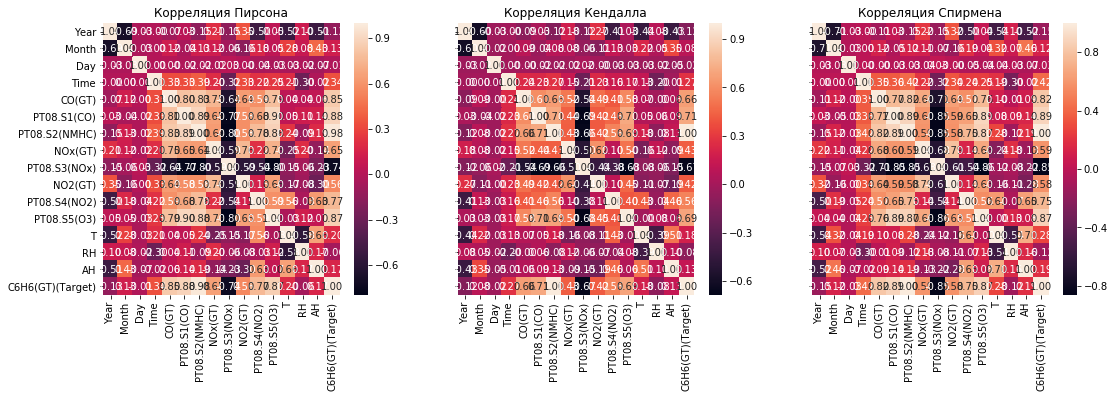

In [14]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(18,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
ax[0].title.set_text('Корреляция Пирсона')
ax[1].title.set_text('Корреляция Кендалла')
ax[2].title.set_text('Корреляция Спирмена')

<pre style="font-family: 'Arial'">    Рассмотрим зависимости концентрации бензола(целевого признака) от нескольких параметров:</pre>

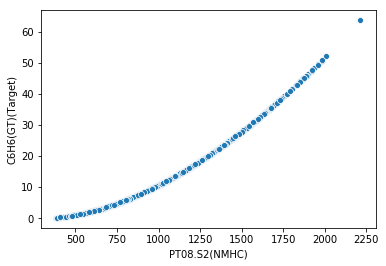

In [15]:
sns.scatterplot(x='PT08.S2(NMHC)', y='C6H6(GT)(Target)', data=data)

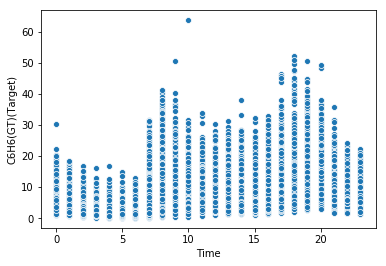

In [16]:
sns.scatterplot(x='Time', y='C6H6(GT)(Target)', data=data)

<pre style="font-family: 'Arial'">    В качестве моделей машинного обучения будем тиспользовать следующий набор:
        1. Метод К соседей (Библиотека SkikitLearn)
        2. Линейная регессия (Библиотека SkikitLearn)
        3. Метод опорных векторов SVR (Библиотека SkikitLearn)
        4. Метод Градиентного бустинга CatBoostRegressor (Библиотека CatBoost)
        5. Случайный лес (Библиотека SkikitLearn)
</pre>


In [17]:
DataInst = data2[['Year','Month','Day','Time','CO(GT)','PT08.S1(CO)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)',
                 'PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']]
DataTarget = data2['C6H6(GT)(Target)']
TrainX, TestX, TrainY, TestY = train_test_split(DataInst,DataTarget, test_size=0.3, random_state = 1)


In [18]:
def ModelLearnReport(Model,trainX,trainY,testX,testY):
    Model.fit(trainX,trainY)
    ModelPredict = Model.predict(testX)
    print("Средняя абсолютная ошибка:\t",round(mean_absolute_error(testY, ModelPredict),6))
    print("Средняя квадратичная ошибка:\t",round(mean_squared_error(testY, ModelPredict),6))
    print("Коэффициент детерминации:\t",round(r2_score(testY, ModelPredict),6))
    print("Explained variance score:\t",round(explained_variance_score(testY, ModelPredict),6))

<h3 style="font-family: 'Arial'">Метод К соседей</h3>

In [52]:
from sklearn.neighbors import KNeighborsRegressor
KNeighborsRegressor()

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [29]:
KNNRSP = KNeighborsRegressor(n_neighbors=7) # KNNRSP - K Nearest Neighbors Regressor Standart Parameters
ModelLearnReport(KNNRSP,TrainX,TrainY,TestX,TestY)

Средняя абсолютная ошибка:	 0.495902
Средняя квадратичная ошибка:	 0.707946
Коэффициент детерминации:	 0.986671
Explained variance score:	 0.986804


In [28]:
TuningParameters = [{'n_neighbors':np.array(range(1,16))}]
GS = GridSearchCV(KNeighborsRegressor(), TuningParameters, cv=20, scoring='explained_variance')
GS.fit(DataInst,DataTarget)
print('Подобранный оптимальный гиперпараметр: ', GS.best_params_.get('n_neighbors'))
KNNRGS = KNeighborsRegressor(n_neighbors=GS.best_params_.get('n_neighbors')) 
ModelLearnReport(KNNRGS,TrainX,TrainY,TestX,TestY)

Подобранный оптимальный гиперпараметр:  5
Средняя абсолютная ошибка:	 0.481127
Средняя квадратичная ошибка:	 0.646687
Коэффициент детерминации:	 0.987825
Explained variance score:	 0.987922


<h3 style="font-family: 'Arial'">Линейная регрессия</h3>

In [51]:
from sklearn.linear_model import Lasso
Lasso()

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [48]:
LRSP = Lasso() # LRSP - Linear Regression Standart Parameters
ModelLearnReport(LRSP,TrainX,TrainY,TestX,TestY)

Средняя абсолютная ошибка:	 0.829511
Средняя квадратичная ошибка:	 1.395132
Коэффициент детерминации:	 0.973734
Explained variance score:	 0.973756


In [50]:
TuningParameters = [{'alpha':[0.001,0.01,0.1,1,10,100,1000]}]
GS = GridSearchCV(Lasso(), TuningParameters, cv=20, scoring='explained_variance')
GS.fit(DataInst,DataTarget)
print('Подобранный оптимальный гиперпараметр: ', GS.best_params_.get('alpha'))
LRGS = Lasso(alpha=GS.best_params_.get('alpha')) 
ModelLearnReport(LRGS,TrainX,TrainY,TestX,TestY)

Подобранный оптимальный гиперпараметр:  0.001
Средняя абсолютная ошибка:	 0.627775
Средняя квадратичная ошибка:	 0.947311
Коэффициент детерминации:	 0.982165
Explained variance score:	 0.982189


<h3 style="font-family: 'Arial'">Метод опорных векторов</h3>

In [56]:
from sklearn.svm import LinearSVR
LinearSVR()

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [57]:
LSVRSP = LinearSVR() # LSVRSP - Linear Support Vector Regressor Standart Parameters
ModelLearnReport(LSVRSP,TrainX,TrainY,TestX,TestY)

Средняя абсолютная ошибка:	 0.938255
Средняя квадратичная ошибка:	 1.811378
Коэффициент детерминации:	 0.965897
Explained variance score:	 0.974485


In [60]:
TuningParameters = [{'C':[0.001,0.01,0.1,1]}]
GS = GridSearchCV(LinearSVR(), TuningParameters, cv=20, scoring='explained_variance')
GS.fit(DataInst,DataTarget)
print('Подобранный оптимальный гиперпараметр: ', GS.best_params_.get('C'))
LSVRGS = LinearSVR(C=GS.best_params_.get('C')) 
ModelLearnReport(LSVRGS,TrainX,TrainY,TestX,TestY)

Подобранный оптимальный гиперпараметр:  0.001
Средняя абсолютная ошибка:	 0.772253
Средняя квадратичная ошибка:	 1.425063
Коэффициент детерминации:	 0.97317
Explained variance score:	 0.973287


<h3 style="font-family: 'Arial'">Случайный лес</h3>

In [61]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [65]:
RFRSP = RandomForestRegressor(n_estimators=5) # RFRSP - Random Forest Regressor Standart Parameters
ModelLearnReport(RFRSP,TrainX,TrainY,TestX,TestY)

Средняя абсолютная ошибка:	 0.016857
Средняя квадратичная ошибка:	 0.024302
Коэффициент детерминации:	 0.999542
Explained variance score:	 0.999542


In [76]:
TuningParameters = [{'n_estimators':np.array(range(1,50))}]
GS = GridSearchCV(RandomForestRegressor(), TuningParameters, cv=20, scoring='explained_variance')
GS.fit(DataInst,DataTarget)
print('Подобранный оптимальный гиперпараметр: ', GS.best_params_.get('n_estimators'))
RFRGS = RandomForestRegressor(n_estimators=GS.best_params_.get('n_estimators')) 
ModelLearnReport(RFRGS,TrainX,TrainY,TestX,TestY)

Подобранный оптимальный гиперпараметр:  37
Средняя абсолютная ошибка:	0.014251
Средняя квадратичная ошибка:	0.021874
Коэффициент детерминации:	0.999683
Explained variance score:	0.999691


<h3 style="font-family: 'Arial'">Бустинг</h3>

In [70]:
from sklearn.ensemble import AdaBoostRegressor
AdaBoostRegressor()

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [71]:
ABRSP = AdaBoostRegressor(n_estimators=10) # RFRSP - Random Forest Regressor Standart Parameters
ModelLearnReport(ABRSP,TrainX,TrainY,TestX,TestY)

Средняя абсолютная ошибка:	 0.675365
Средняя квадратичная ошибка:	 0.717556
Коэффициент детерминации:	 0.98649
Explained variance score:	 0.986502


In [73]:
TuningParameters = [{'n_estimators':np.array(range(1,50))}]
GS = GridSearchCV(AdaBoostRegressor(), TuningParameters, cv=20, scoring='explained_variance')
GS.fit(DataInst,DataTarget)
print('Подобранный оптимальный гиперпараметр: ', GS.best_params_.get('n_estimators'))
ABRGS = AdaBoostRegressor(n_estimators=GS.best_params_.get('n_estimators')) 
ModelLearnReport(ABRGS,TrainX,TrainY,TestX,TestY)

Подобранный оптимальный гиперпараметр:  40
Средняя абсолютная ошибка:	 0.530601
Средняя квадратичная ошибка:	 0.48426
Коэффициент детерминации:	 0.990883
Explained variance score:	 0.990884
